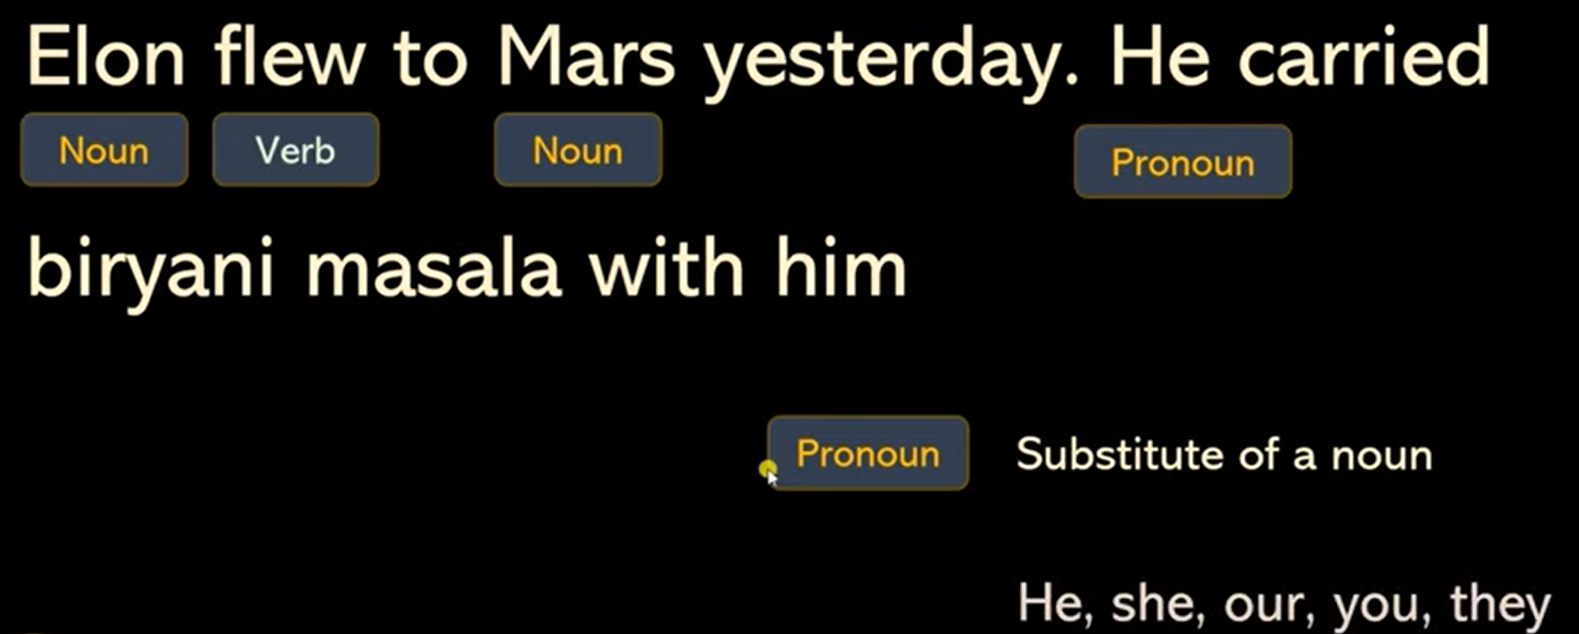
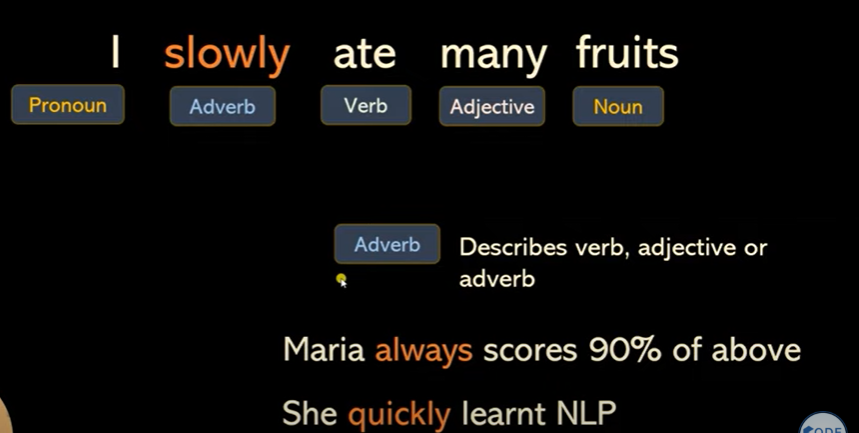
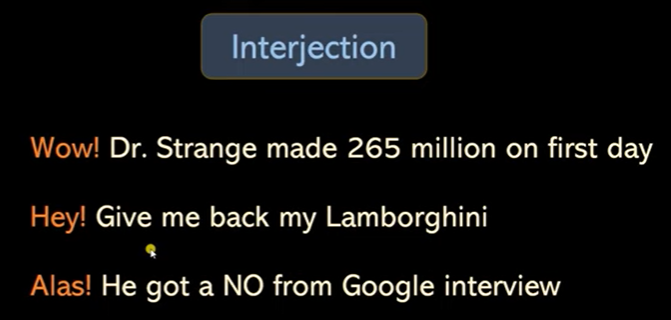
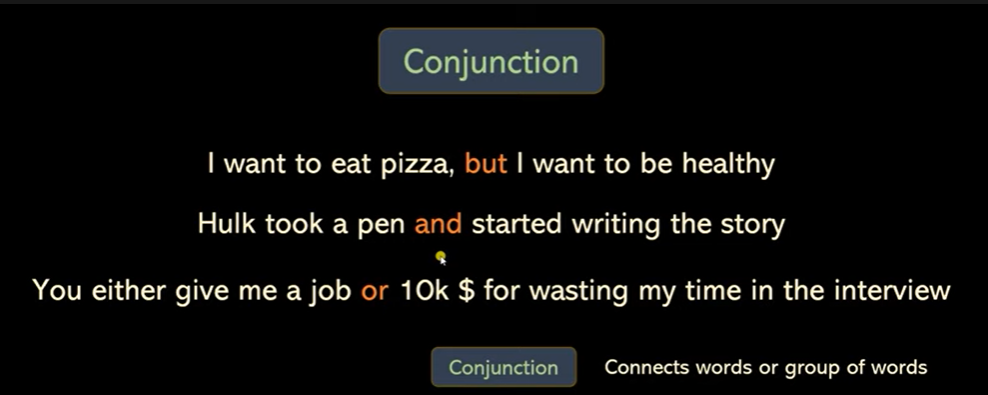
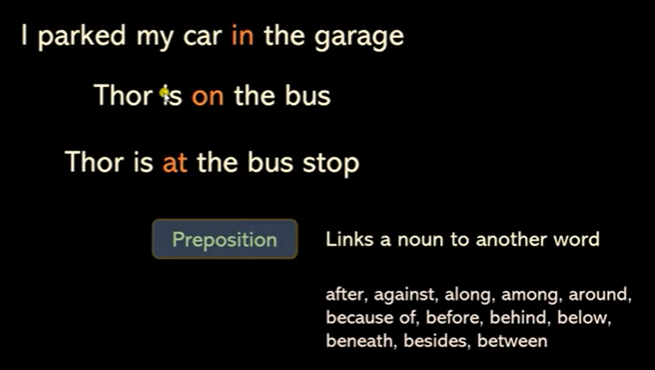
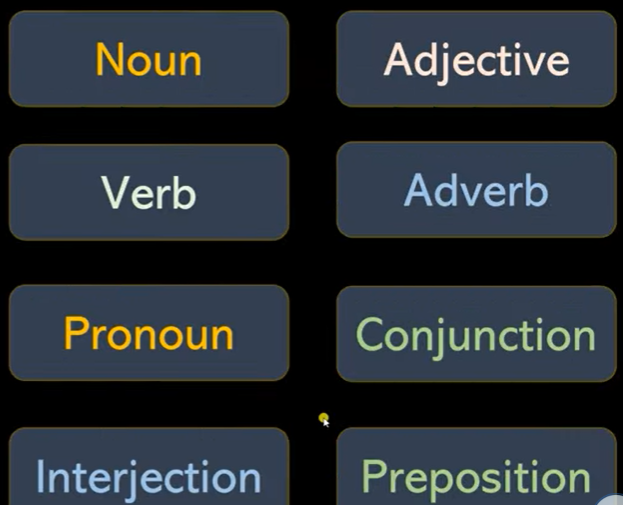

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("Elon flew to mars yesterday. He carried biryani masala with him")

for token in doc:
    print(token,"|",token.pos_,"|",spacy.explain(token.pos_))

Elon | PROPN | proper noun
flew | VERB | verb
to | ADP | adposition
mars | NOUN | noun
yesterday | NOUN | noun
. | PUNCT | punctuation
He | PRON | pronoun
carried | VERB | verb
biryani | ADJ | adjective
masala | NOUN | noun
with | ADP | adposition
him | PRON | pronoun


* "made" is a verb but in the past tense so how to know that 

In [2]:
doc = nlp("Wow! Dr. Strange made, 265 million $ on the very first day")

for token in doc:
    print(token,"|",token.pos_,"|",spacy.explain(token.pos_), "|",
         token.tag_,"|",spacy.explain(token.tag_))

Wow | INTJ | interjection | UH | interjection
! | PUNCT | punctuation | . | punctuation mark, sentence closer
Dr. | PROPN | proper noun | NNP | noun, proper singular
Strange | PROPN | proper noun | NNP | noun, proper singular
made | VERB | verb | VBD | verb, past tense
, | PUNCT | punctuation | , | punctuation mark, comma
265 | NUM | numeral | CD | cardinal number
million | NUM | numeral | CD | cardinal number
$ | NUM | numeral | CD | cardinal number
on | ADP | adposition | IN | conjunction, subordinating or preposition
the | DET | determiner | DT | determiner
very | ADV | adverb | RB | adverb
first | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
day | NOUN | noun | NN | noun, singular or mass


### Cleaning microsoft earning text

In [3]:
microsoft_text = """Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:

·         Revenue was $51.7 billion and increased 20%

·         Operating income was $22.2 billion and increased 24%

·         Net income was $18.8 billion and increased 21%

·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”

“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft.
"""

In [4]:
doc = nlp(microsoft_text)

filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE","x","PUNCT"]:
        filtered_tokens.append(token)
        
filtered_tokens

[Microsoft,
 Corp.,
 today,
 announced,
 the,
 following,
 results,
 for,
 the,
 quarter,
 ended,
 December,
 31,
 2021,
 as,
 compared,
 to,
 the,
 corresponding,
 period,
 of,
 last,
 fiscal,
 year,
 Revenue,
 was,
 $,
 51.7,
 billion,
 and,
 increased,
 20,
 %,
 Operating,
 income,
 was,
 $,
 22.2,
 billion,
 and,
 increased,
 24,
 %,
 Net,
 income,
 was,
 $,
 18.8,
 billion,
 and,
 increased,
 21,
 %,
 Diluted,
 earnings,
 per,
 share,
 was,
 $,
 2.48,
 and,
 increased,
 22,
 %,
 Digital,
 technology,
 is,
 the,
 most,
 malleable,
 resource,
 at,
 the,
 world,
 ’s,
 disposal,
 to,
 overcome,
 constraints,
 and,
 reimagine,
 everyday,
 work,
 and,
 life,
 said,
 Satya,
 Nadella,
 chairman,
 and,
 chief,
 executive,
 officer,
 of,
 Microsoft,
 As,
 tech,
 as,
 a,
 percentage,
 of,
 global,
 GDP,
 continues,
 to,
 increase,
 we,
 are,
 innovating,
 and,
 investing,
 across,
 diverse,
 and,
 growing,
 markets,
 with,
 a,
 common,
 underlying,
 technology,
 stack,
 and,
 an,
 operating,

In [5]:
count = doc.count_by(spacy.attrs.POS)
count

{96: 14,
 92: 45,
 100: 24,
 90: 9,
 85: 17,
 93: 16,
 97: 27,
 98: 1,
 84: 20,
 103: 11,
 87: 6,
 99: 5,
 89: 12,
 86: 2,
 94: 3,
 95: 2}

In [6]:
doc.vocab[96].text

'PROPN'

In [7]:
for k,v in count.items():
    print(doc.vocab[k].text,"|",v)

PROPN | 14
NOUN | 45
VERB | 24
DET | 9
ADP | 17
NUM | 16
PUNCT | 27
SCONJ | 1
ADJ | 20
SPACE | 11
AUX | 6
SYM | 5
CCONJ | 12
ADV | 2
PART | 3
PRON | 2
